In [1]:
# data obtained from UC Irvine ML Repository
import pandas as pd
mushroom_df = pd.read_csv("C:/Users/crist/Desktop/DAT402/archive/mushrooms.csv")
mushroom_df.head(5)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
mushroom_df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [3]:
mushroom_df.shape

(8124, 23)

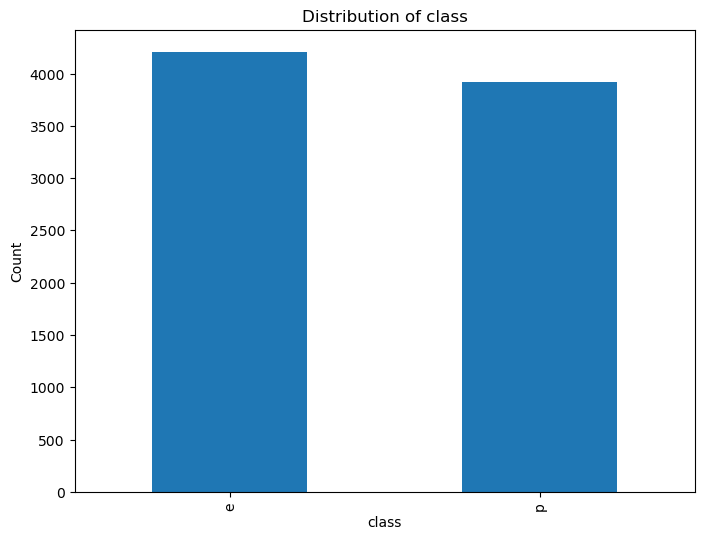

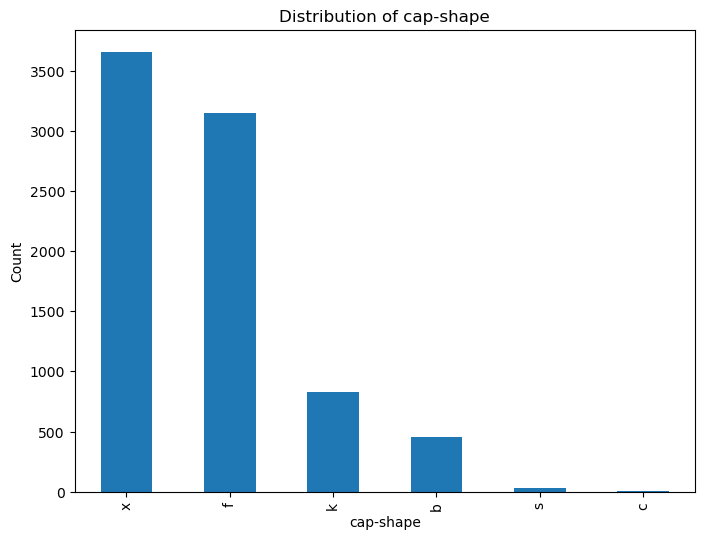

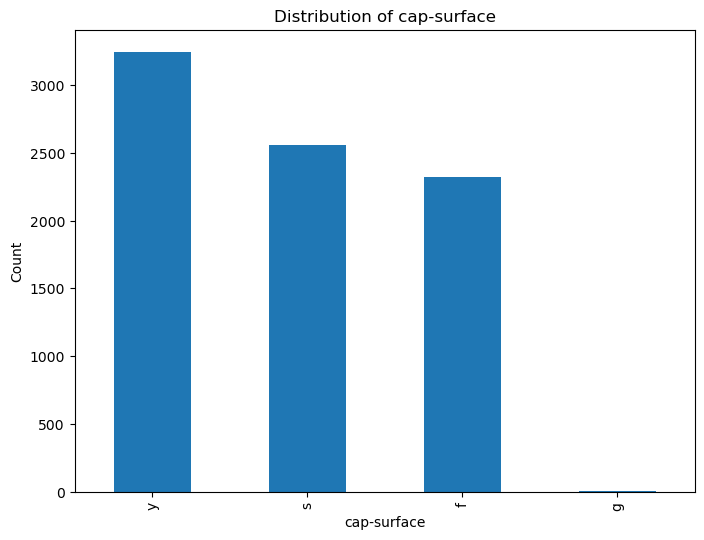

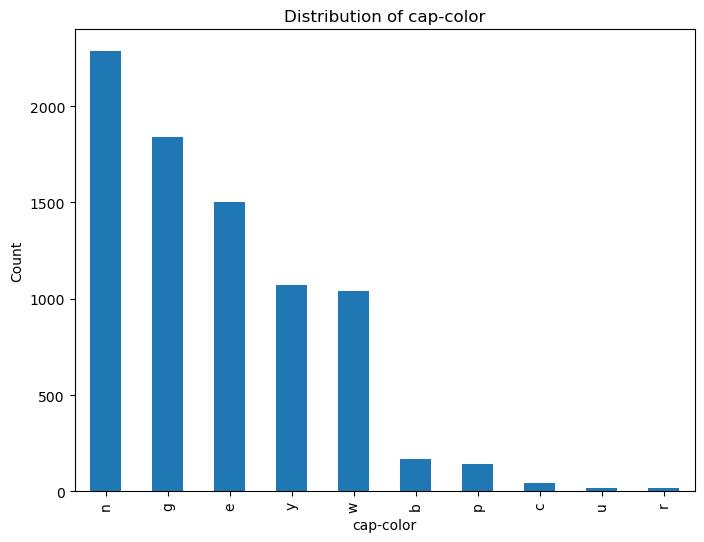

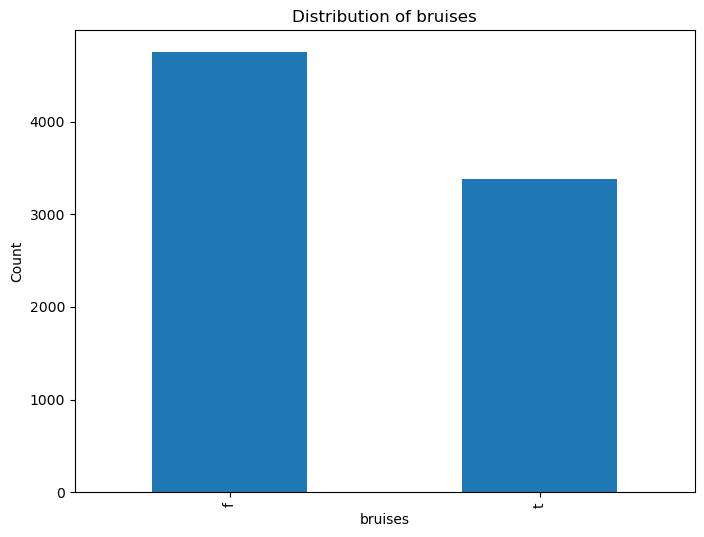

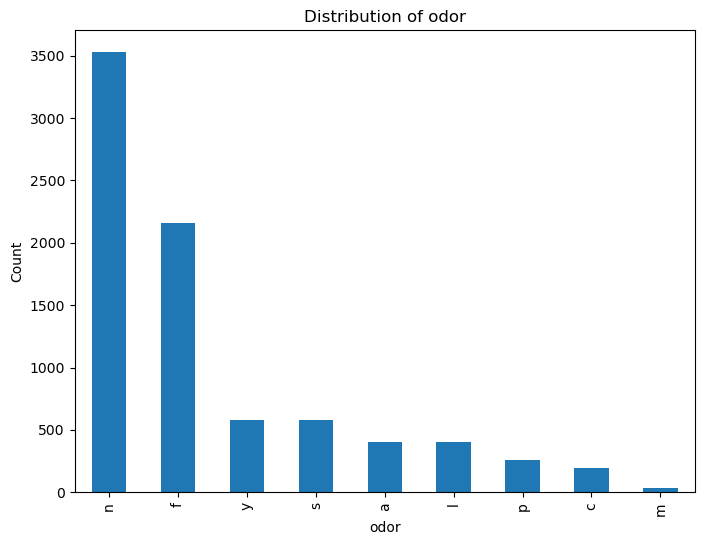

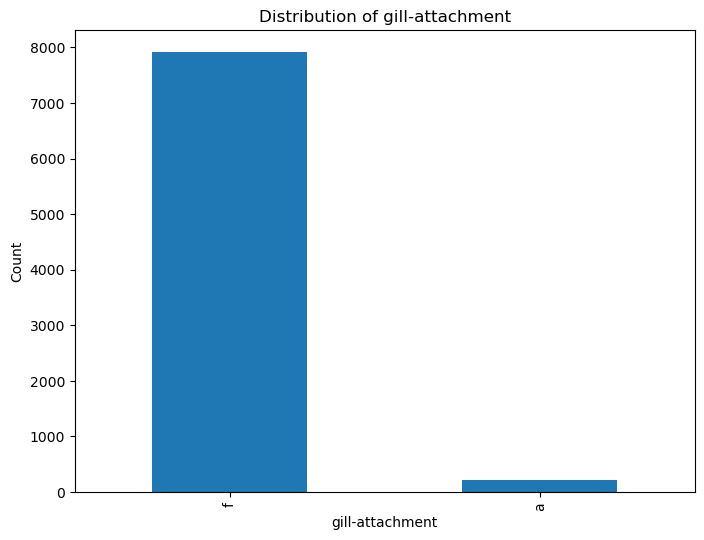

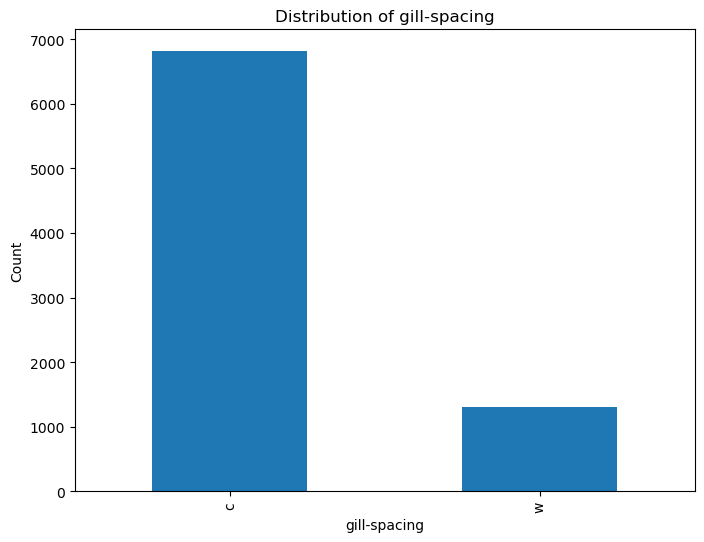

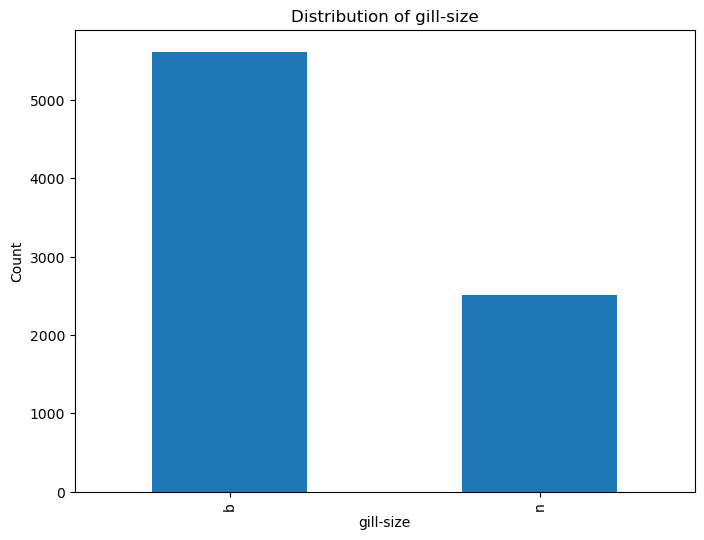

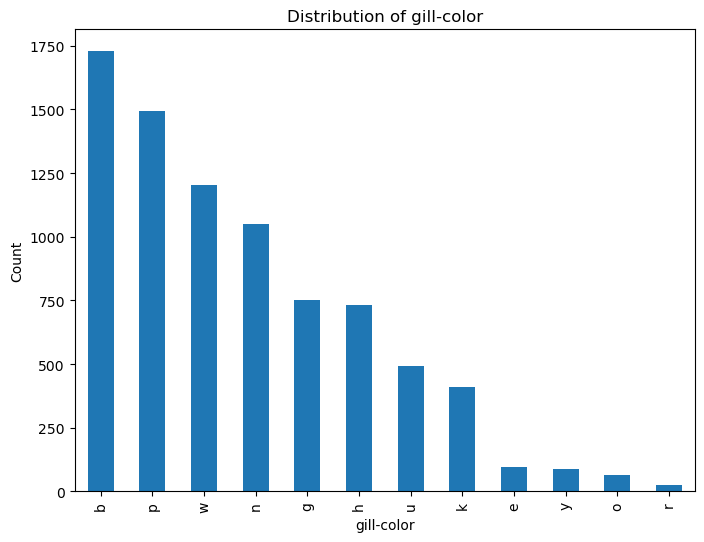

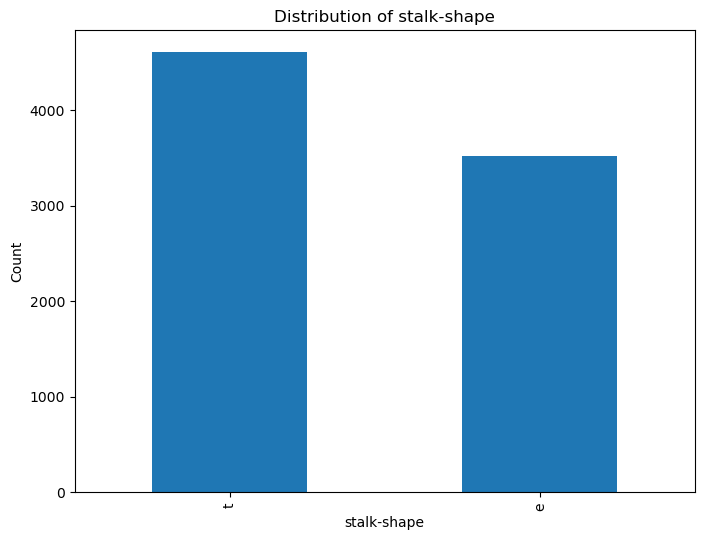

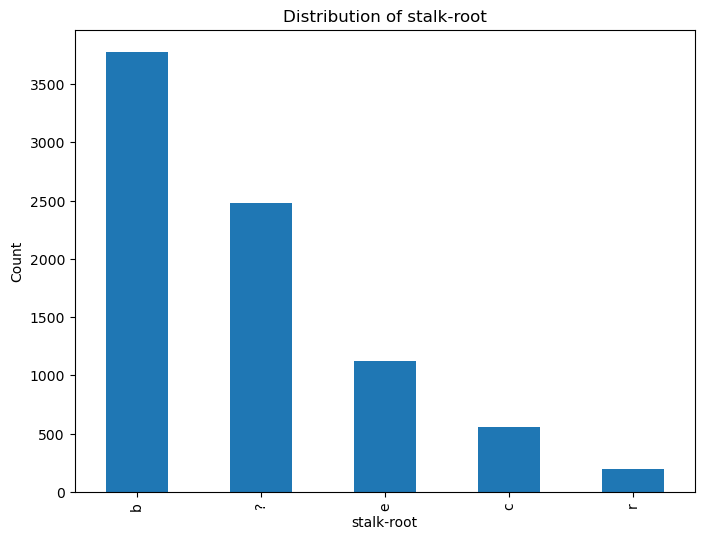

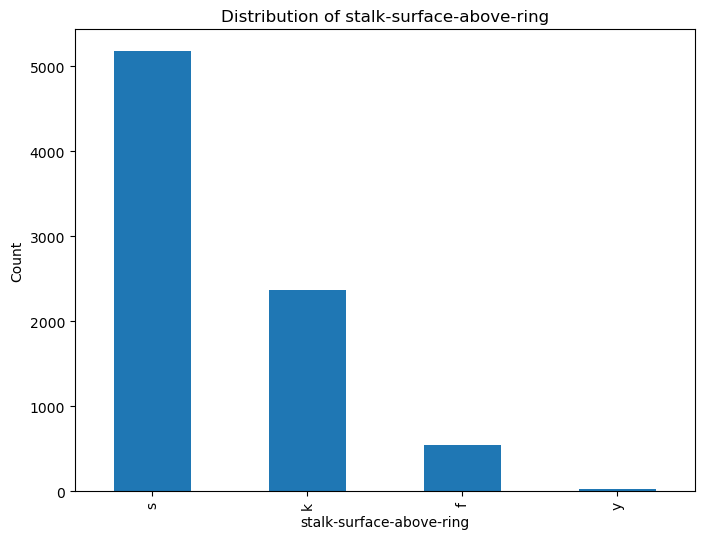

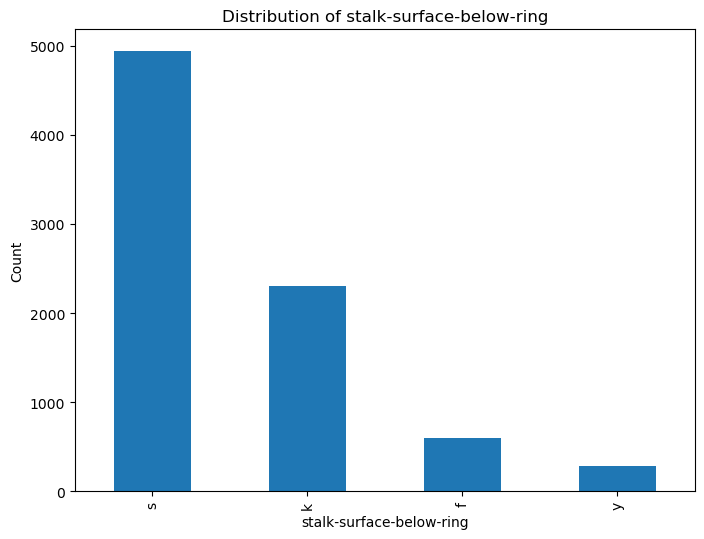

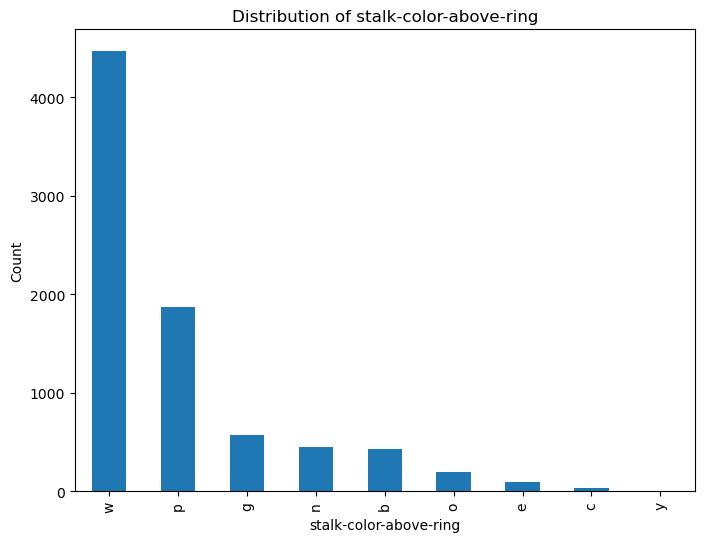

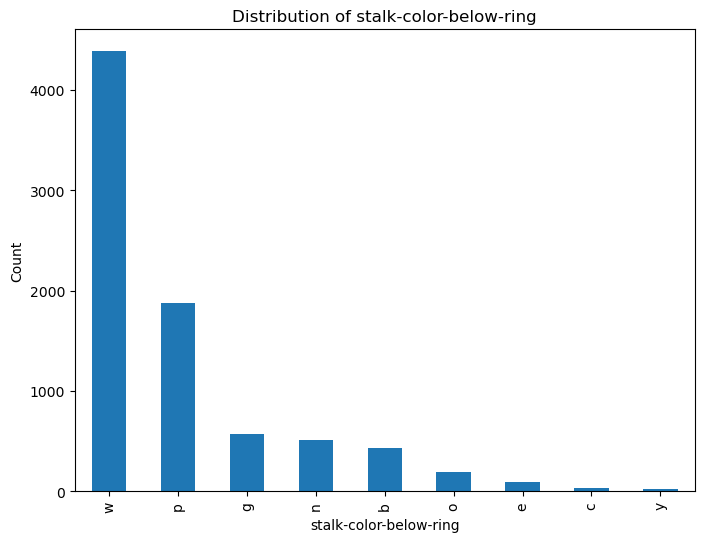

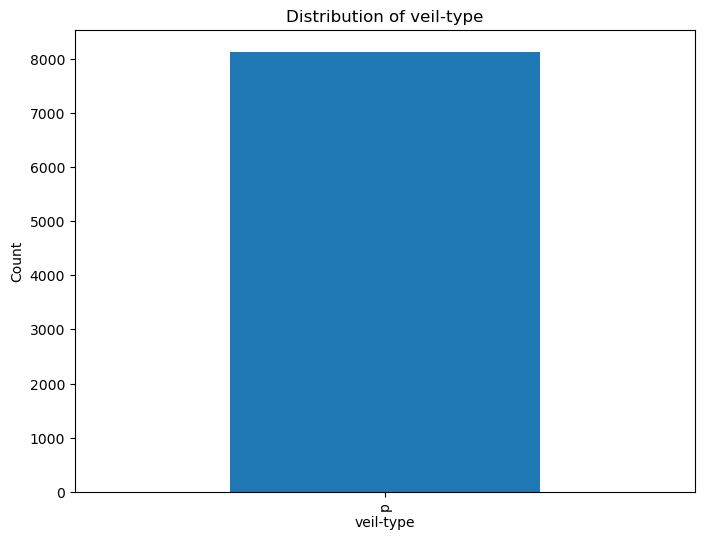

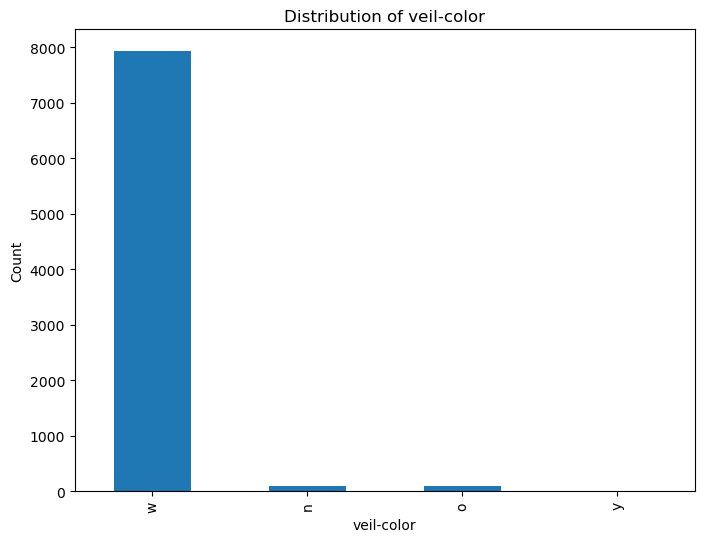

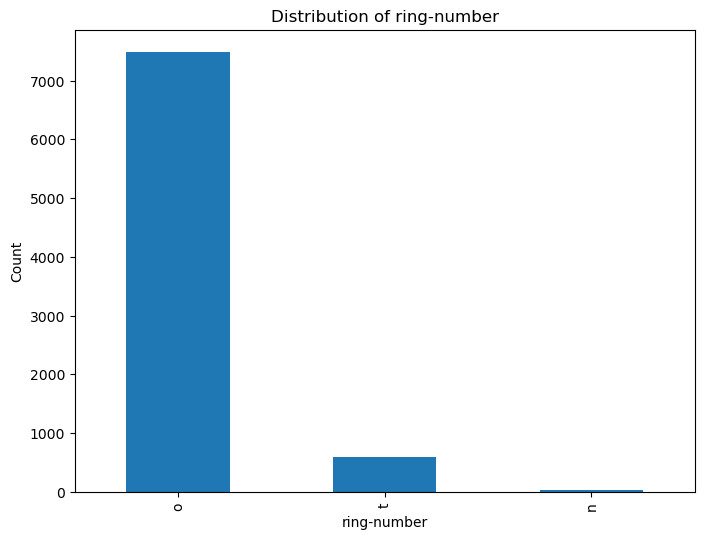

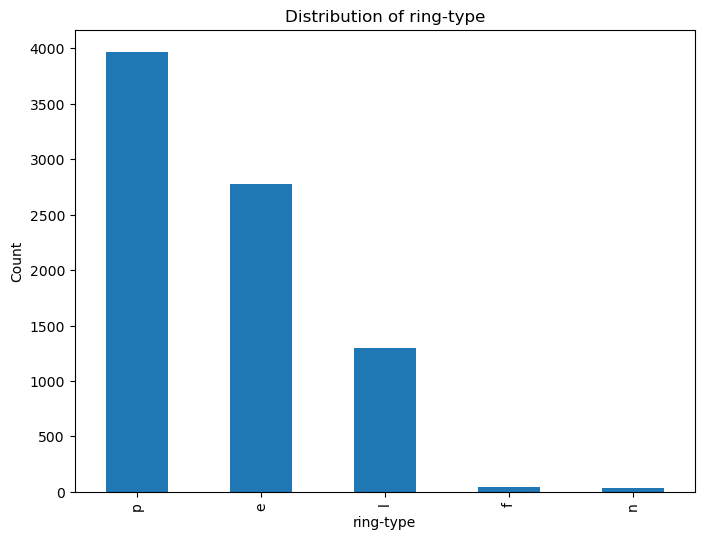

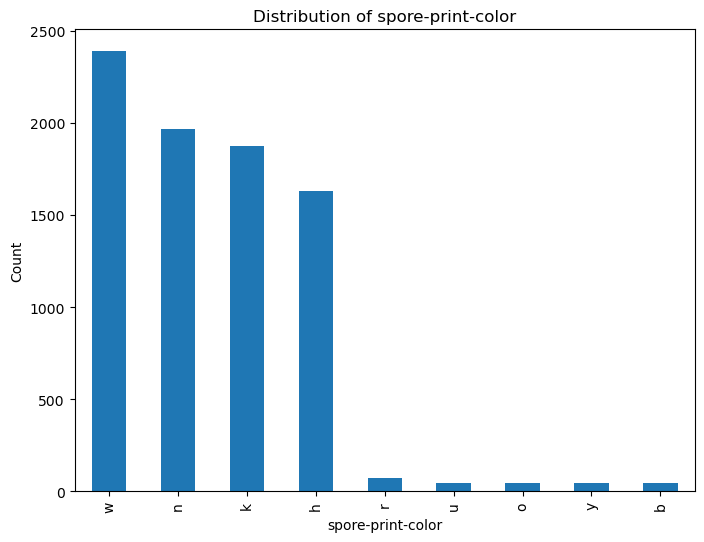

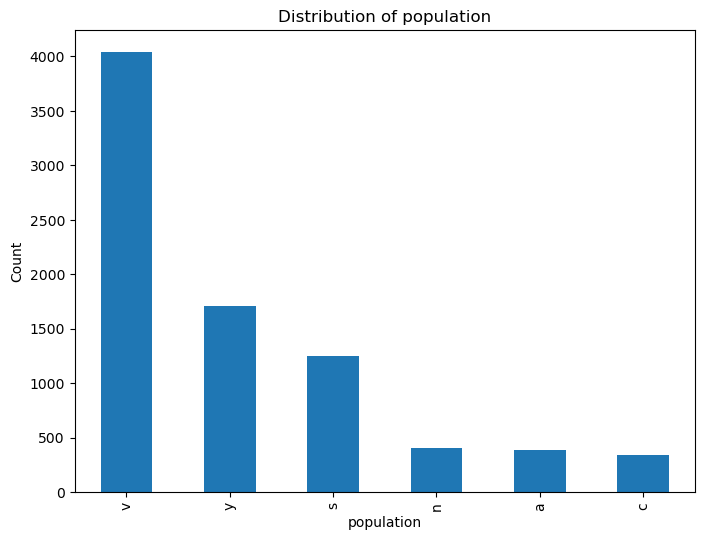

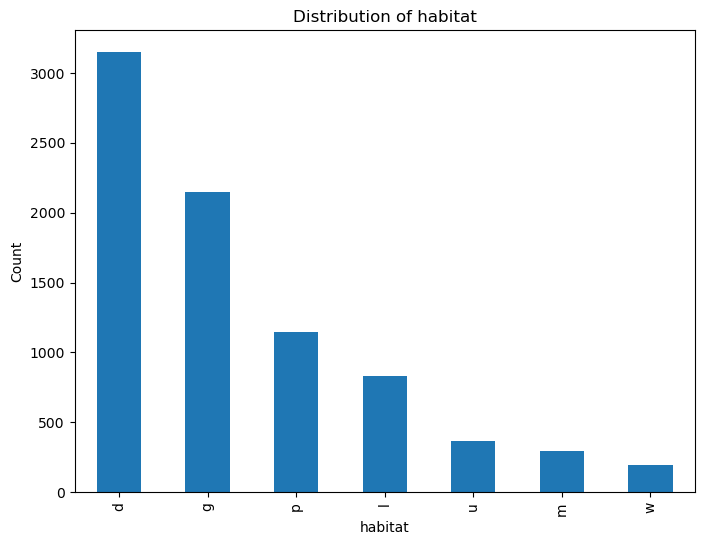

In [4]:
import matplotlib.pyplot as plt
for column in mushroom_df.columns:
    plt.figure(figsize=(8, 6))
    mushroom_df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [5]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
mushroom_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# only stalk-root has missing values, but you cant see it cos it's input as "?"
# it is given in the description that the null values are in "?" form, so im doing this so that i can do simpleimputer later on
import numpy as np
mushroom_df['stalk-root'] = mushroom_df['stalk-root'].replace('?', np.nan)

In [8]:
# confirm the number of null values
mushroom_df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [9]:
mushroom_df = mushroom_df.astype('category')
mushroom_df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [10]:
# perform train/test split
from sklearn.model_selection import train_test_split

#y = mushroom_df['class'] 
#X = mushroom_df.drop(columns=['class'])  # Drop the target column from the features

# Split the data into training and testing sets 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_df, test_df = train_test_split(mushroom_df, test_size=0.2, random_state=42)


In [11]:
# Replace '?' with NaN under the 'stalk-root' column
#train_df['stalk-root'] = train_df['stalk-root'].replace('?', np.nan)
from sklearn.impute import SimpleImputer
# Select categorical columns for imputation
categorical_cols = ['stalk-root']  

# Initialize SimpleImputer for categorical columns
imputer_categorical = SimpleImputer(strategy='most_frequent')

# Fit and transform the column
train_df[categorical_cols] = imputer_categorical.fit_transform(train_df[categorical_cols])

#Can transform on the test data:
test_df[categorical_cols] = imputer_categorical.transform(test_df[categorical_cols])

#test_df.isnull().sum()
train_df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
#check how balanced the dataset is
train_df['class'].value_counts(normalize=True)

e    0.517772
p    0.482228
Name: class, dtype: float64

In [13]:
# encode the training data using one hot encoder, dont use label encoder as it's usually used for output
train_df = train_df.astype('category')
test_df = test_df.astype('category')
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in train_df.columns:
    train_df[column] = labelencoder.fit_transform(train_df[column])
    
train_df.head(5)

for column in test_df.columns:
    test_df[column] = labelencoder.fit_transform(test_df[column])


In [14]:
X_train = train_df.drop(columns = "class")
X_test = test_df.drop(columns = "class")
y_train = train_df["class"]
y_test = test_df["class"]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(6499, 22)
(6499,)
(1625, 22)
(1625,)


In [15]:
print(np.sum([int(i) in X_train.index for i in X_test.index]))
print(np.sum([int(i) in y_train.index for i in y_test.index]))

0
0


In [16]:
#Make sure we don't have any missing data:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0
0
0


In [17]:
def report_metrics(y_truth, y_pred):

    from sklearn import metrics

    cm = metrics.confusion_matrix(y_truth, y_pred)

    print(metrics.classification_report(y_truth, y_pred))

    #Sensitivity = TPR = TP / (TP + FN)
    sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])
    print('Sensitivity = ', sensitivity)

    #Specifity = TNR = TN / (TN + FP)
    specifity = cm[0,0] / (cm[0,0] + cm[0,1])
    print('Specifity = ', specifity)

from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB()

#Fit
clf.fit(X_train, y_train)

#Predict on *testing* data
y_pred_cat = clf.predict(X_test)
report_metrics(y_test, y_pred_cat)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       843
           1       0.99      0.91      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Sensitivity =  0.9092071611253197
Specifity =  0.9893238434163701


In [27]:
# NB accuracy under cross-validation
cross_val_accuracies = cross_val_score(clf, X_train, y_train,
                              scoring="accuracy", cv=3)

cross_val_accuracies

array([0.94600831, 0.95152355, 0.9478301 ])

AUC = 0.9975


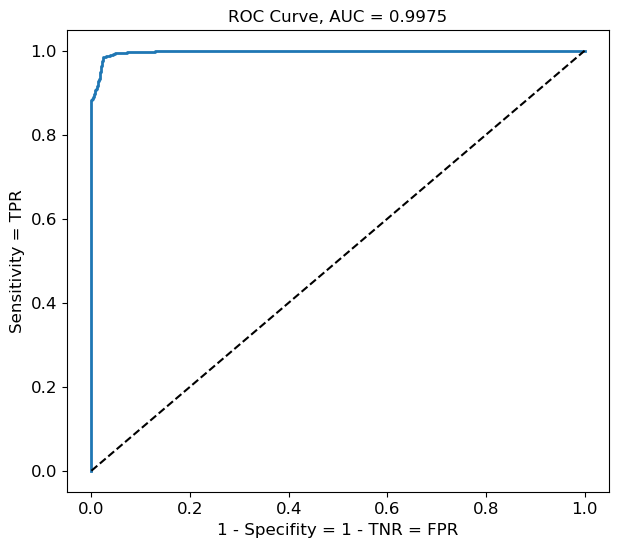

In [18]:
import matplotlib.pyplot as plt
def plot_roc(y_truth, y_prob):

    from sklearn.metrics import roc_curve

    FPR, TPR, thresholds = roc_curve(y_truth, y_prob)


    fig1, ax1 = plt.subplots(1, 1, figsize=(7,6))

    ax1.step(FPR, TPR, linewidth=2)
    ax1.plot([0,1], [0,1], '--', color = 'black')

    fs = 12
    ax1.set_xlabel('1 - Specifity = 1 - TNR = FPR', fontsize=fs)
    ax1.set_ylabel('Sensitivity = TPR', fontsize=fs)
    ax1.tick_params(axis='both', labelsize=fs)

    AUC = np.trapz(TPR, FPR)
    ax1.set_title('ROC Curve, AUC = ' + str(round(AUC,4)))

    print('AUC = ' + str(round(AUC,4)))

y_probas_cat = clf.predict_proba(X_test)

plot_roc(y_test, y_probas_cat[:,1])

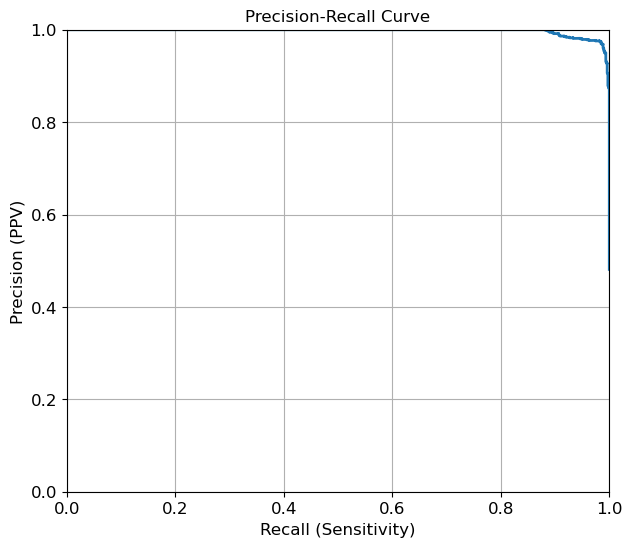

In [19]:
def plot_pr(y_truth, y_prob):
    from sklearn.metrics import precision_recall_curve

    precisions, recalls, thresholds = precision_recall_curve(y_truth, y_prob)

    fig1, ax1 = plt.subplots(1, 1, figsize=(7,6))

    ax1.step(recalls, precisions, linewidth=2)
    ax1.grid()

    #Axis labels, etc.
    fs = 12
    ax1.set_xlabel('Recall (Sensitivity)', fontsize=fs)
    ax1.set_ylabel('Precision (PPV)', fontsize=fs)
    ax1.tick_params(axis='both', labelsize=fs)

    ax1.set_title('Precision-Recall Curve')
    ax1.set_ylim([0, 1])
    ax1.set_xlim([0, 1])

plot_pr(y_test, y_probas_cat[:,1])

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
#Fit the model:
knn_clf.fit(X_train, y_train)

#Get predictions on training data:
y_train_pred = knn_clf.predict(X_train)

In [26]:
# knn accuracy under cross-validation
from sklearn.model_selection import cross_val_score

cross_val_accuracies = cross_val_score(knn_clf, X_train, y_train,
                              scoring="accuracy", cv=3)

cross_val_accuracies

array([0.99953853, 0.99953832, 1.        ])

In [21]:
## Grab it and use it
from sklearn.model_selection import GridSearchCV, KFold

#Parameters dictionary:
parameters = {'n_neighbors': range(1, 200, 1)}

#Model
knn_clf = KNeighborsClassifier()

#Create it
grid_search = GridSearchCV(knn_clf, parameters, cv=KFold(n_splits=10, shuffle=True),
                          scoring="accuracy")

#And fit it:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 200)}, scoring='accuracy')

Text(0, 0.5, 'Accuracy')

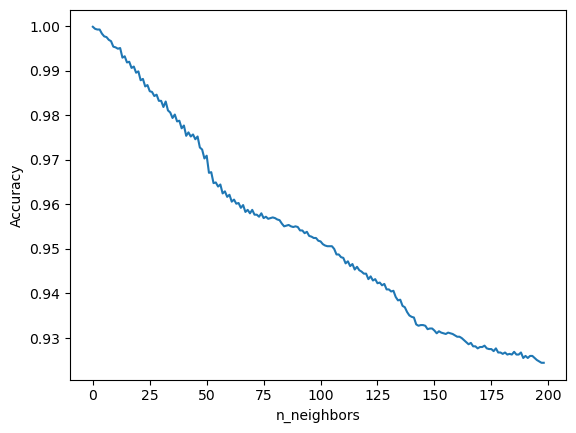

In [22]:
plt.plot(grid_search.cv_results_['mean_test_score']);

plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

In [23]:
grid_search.best_params_

{'n_neighbors': 1}

In [24]:
##Set k = grid_search.best_params_
knn_clf = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_test_pred = knn_clf.predict(X_test)

# Evaluate the model using appropriate metrics (e.g., accuracy, precision, recall, F1-score):
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Accuracy: 0.9993846153846154
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

